<a href="https://colab.research.google.com/github/sarahtraore/ecolution_project/blob/master/My_first_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Start with loading all necessary libraries
!pip install google_trans_new
import google_trans_new
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from google_trans_new import google_translator

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/facebook_comments.csv', encoding = 'latin-1', index_col=0)
df.head()

,Category,reviews
label,,
0,invoicing,Hello dear all. I find myself this morning wit...
0,invoicing,I would like to meet a manager of Sodeci and O...
0,invoicing,"I am a home owner, after more than 8 months of..."
0,Shortage,Good evening everyone since yesterday morning ...
0,invoicing,Big rant against SODECI. Is it normal that we ...


In [3]:
#Explore dataframe
print(len(df))
df.dtypes
type(df)
df.info()
#length of each review
df['len'] = df['reviews'].apply(len)
df.head()

60
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 1
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  60 non-null     object
 1   reviews   60 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


,Category,reviews,len
label,,,
0,invoicing,Hello dear all. I find myself this morning wit...,1091
0,invoicing,I would like to meet a manager of Sodeci and O...,823
0,invoicing,"I am a home owner, after more than 8 months of...",924
0,Shortage,Good evening everyone since yesterday morning ...,824
0,invoicing,Big rant against SODECI. Is it normal that we ...,754


In [4]:

#Translate the dataframe

df_list = list(df['reviews'])
print(df_list)

trans = google_translator()
rev_eng = [trans.translate(x, lang_src='fr', lang_tgt='en') for x in df_list]

df['review_eng'] = rev_eng
df.to_csv('rev_eng')
df.head()


["Hello dear all. I find myself this morning with a SODECI closure notice because according to them the invoices have been unpaid since 2018. And yet we always pay by Orange money or Moovmoney since 2018. After a little check, we realize that since 2018 we have been paying someone else's bills. And what hurts me the most is that, having seen the unpaid amounts over the years, they are only small sums, 2000 fr, 1500, 3000 fr while we paid the bills of the other to height of 5000, 6000, 9000 fr. Fortunately we have all the screenshots of our electronic payments. My question: how do we find the person whose bills we pay? And is there a way of reimbursement? Of course, we must pay the unpaid amount today to avoid closure and take the correct number of the meter. PS: the owner had allocated the meters to each apartment long after we had moved into his building, he must have been wrong (with reservations) on the invoice numbers because the name of his wife is on everyone's bills. its tenants

,Category,reviews,len,review_eng
label,,,,
0,invoicing,Hello dear all. I find myself this morning wit...,1091,Hello dear all. I find myself this morning wit...
0,invoicing,I would like to meet a manager of Sodeci and O...,823,I would like to meet a manager of Sodeci and O...
0,invoicing,"I am a home owner, after more than 8 months of...",924,"I am a home owner, after more than 8 months of..."
0,Shortage,Good evening everyone since yesterday morning ...,824,Good evening everyone since yesterday morning ...
0,invoicing,Big rant against SODECI. Is it normal that we ...,754,Big rant against SODECI. Is it normal that we ...


In [5]:
by_category = df.groupby("Category")
by_category.describe().head()  #'describe' generates a summary statistics
by_category.mean().sort_values(by ="Category", ascending = True).head()


,len
Category,
Shortage,492.136364
access,229.000000
control,1060.000000
invoicing,853.166667
maintenance,694.857143


In [6]:
import nltk 
import io 
import unicodedata 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tokenize import PunktSentenceTokenizer 
from nltk.tokenize import PunktSentenceTokenizer 
from nltk.corpus import webtext 
from nltk.stem.porter import PorterStemmer 
from nltk.stem.wordnet import WordNetLemmatizer 

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [8]:
# tokenizer/lemmatization
#[word_tokenize(x) for x in translated_list]
translated_list = list(df['review_eng'])
sent_tokenizer = PunktSentenceTokenizer() #tokenizing function
sents = [sent_tokenizer.tokenize(x) for x in translated_list]  #tokenize each element of the list
print(sents)


[['Hello dear all.', 'I find myself this morning with a SODECI closure notice because according to them the invoices have been unpaid since 2018.', 'And yet we always pay by Orange money or Moovmoney since 2018.', "After a little check, we realize that since 2018 we have been paying someone else's bills.", 'And what hurts me the most is that, having seen the unpaid amounts over the years, they are only small sums, 2000 fr, 1500, 3000 fr while we paid the bills of the other to height of 5000, 6000, 9000 fr.', 'Fortunately we have all the screenshots of our electronic payments.', 'My question: how do we find the person whose bills we pay?', 'And is there a way of reimbursement?', 'Of course, we must pay the unpaid amount today to avoid closure and take the correct number of the meter.', "PS: the owner had allocated the meters to each apartment long after we had moved into his building, he must have been wrong (with reservations) on the invoice numbers because the name of his wife is on e

In [9]:
#Tokenize the text with word_tokenize()
wordto = [word_tokenize(x) for x in translated_list]
print(wordto)

[['Hello', 'dear', 'all', '.', 'I', 'find', 'myself', 'this', 'morning', 'with', 'a', 'SODECI', 'closure', 'notice', 'because', 'according', 'to', 'them', 'the', 'invoices', 'have', 'been', 'unpaid', 'since', '2018', '.', 'And', 'yet', 'we', 'always', 'pay', 'by', 'Orange', 'money', 'or', 'Moovmoney', 'since', '2018', '.', 'After', 'a', 'little', 'check', ',', 'we', 'realize', 'that', 'since', '2018', 'we', 'have', 'been', 'paying', 'someone', 'else', "'s", 'bills', '.', 'And', 'what', 'hurts', 'me', 'the', 'most', 'is', 'that', ',', 'having', 'seen', 'the', 'unpaid', 'amounts', 'over', 'the', 'years', ',', 'they', 'are', 'only', 'small', 'sums', ',', '2000', 'fr', ',', '1500', ',', '3000', 'fr', 'while', 'we', 'paid', 'the', 'bills', 'of', 'the', 'other', 'to', 'height', 'of', '5000', ',', '6000', ',', '9000', 'fr', '.', 'Fortunately', 'we', 'have', 'all', 'the', 'screenshots', 'of', 'our', 'electronic', 'payments', '.', 'My', 'question', ':', 'how', 'do', 'we', 'find', 'the', 'person

In [10]:
#Combine multiple list
import itertools
combined_list = list(itertools.chain.from_iterable(wordto))
print(combined_list)

['Hello', 'dear', 'all', '.', 'I', 'find', 'myself', 'this', 'morning', 'with', 'a', 'SODECI', 'closure', 'notice', 'because', 'according', 'to', 'them', 'the', 'invoices', 'have', 'been', 'unpaid', 'since', '2018', '.', 'And', 'yet', 'we', 'always', 'pay', 'by', 'Orange', 'money', 'or', 'Moovmoney', 'since', '2018', '.', 'After', 'a', 'little', 'check', ',', 'we', 'realize', 'that', 'since', '2018', 'we', 'have', 'been', 'paying', 'someone', 'else', "'s", 'bills', '.', 'And', 'what', 'hurts', 'me', 'the', 'most', 'is', 'that', ',', 'having', 'seen', 'the', 'unpaid', 'amounts', 'over', 'the', 'years', ',', 'they', 'are', 'only', 'small', 'sums', ',', '2000', 'fr', ',', '1500', ',', '3000', 'fr', 'while', 'we', 'paid', 'the', 'bills', 'of', 'the', 'other', 'to', 'height', 'of', '5000', ',', '6000', ',', '9000', 'fr', '.', 'Fortunately', 'we', 'have', 'all', 'the', 'screenshots', 'of', 'our', 'electronic', 'payments', '.', 'My', 'question', ':', 'how', 'do', 'we', 'find', 'the', 'person'

In [11]:
  
nltk_tokens = [nltk.word_tokenize(w) for w in combined_list]
print(nltk_tokens)  

[['Hello'], ['dear'], ['all'], ['.'], ['I'], ['find'], ['myself'], ['this'], ['morning'], ['with'], ['a'], ['SODECI'], ['closure'], ['notice'], ['because'], ['according'], ['to'], ['them'], ['the'], ['invoices'], ['have'], ['been'], ['unpaid'], ['since'], ['2018'], ['.'], ['And'], ['yet'], ['we'], ['always'], ['pay'], ['by'], ['Orange'], ['money'], ['or'], ['Moovmoney'], ['since'], ['2018'], ['.'], ['After'], ['a'], ['little'], ['check'], [','], ['we'], ['realize'], ['that'], ['since'], ['2018'], ['we'], ['have'], ['been'], ['paying'], ['someone'], ['else'], ["'s"], ['bills'], ['.'], ['And'], ['what'], ['hurts'], ['me'], ['the'], ['most'], ['is'], ['that'], [','], ['having'], ['seen'], ['the'], ['unpaid'], ['amounts'], ['over'], ['the'], ['years'], [','], ['they'], ['are'], ['only'], ['small'], ['sums'], [','], ['2000'], ['fr'], [','], ['1500'], [','], ['3000'], ['fr'], ['while'], ['we'], ['paid'], ['the'], ['bills'], ['of'], ['the'], ['other'], ['to'], ['height'], ['of'], ['5000'], ['

In [12]:
#Stemmatization of the words in the list
porter_stemmer = PorterStemmer() 

stemmed_list= [porter_stemmer.stem(word) for word in combined_list]
print(stemmed_list)


['hello', 'dear', 'all', '.', 'I', 'find', 'myself', 'thi', 'morn', 'with', 'a', 'sodeci', 'closur', 'notic', 'becaus', 'accord', 'to', 'them', 'the', 'invoic', 'have', 'been', 'unpaid', 'sinc', '2018', '.', 'and', 'yet', 'we', 'alway', 'pay', 'by', 'orang', 'money', 'or', 'moovmoney', 'sinc', '2018', '.', 'after', 'a', 'littl', 'check', ',', 'we', 'realiz', 'that', 'sinc', '2018', 'we', 'have', 'been', 'pay', 'someon', 'els', "'s", 'bill', '.', 'and', 'what', 'hurt', 'me', 'the', 'most', 'is', 'that', ',', 'have', 'seen', 'the', 'unpaid', 'amount', 'over', 'the', 'year', ',', 'they', 'are', 'onli', 'small', 'sum', ',', '2000', 'fr', ',', '1500', ',', '3000', 'fr', 'while', 'we', 'paid', 'the', 'bill', 'of', 'the', 'other', 'to', 'height', 'of', '5000', ',', '6000', ',', '9000', 'fr', '.', 'fortun', 'we', 'have', 'all', 'the', 'screenshot', 'of', 'our', 'electron', 'payment', '.', 'My', 'question', ':', 'how', 'do', 'we', 'find', 'the', 'person', 'whose', 'bill', 'we', 'pay', '?', 'and

In [13]:
#Lemmatization of the words in the list
wordnet_lemmatizer = WordNetLemmatizer() 

lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in combined_list]
print(lemma_list)

#for w in nltk_tokens: 
 #   print ("Actual: % s Lemma: % s" % (w, wordnet_lemmatizer.lemmatize(w))) 
      
#text_token = nltk.word_tokenize(text) 
#print(nltk.pos_tag(text)) 
#print(text_token)


['Hello', 'dear', 'all', '.', 'I', 'find', 'myself', 'this', 'morning', 'with', 'a', 'SODECI', 'closure', 'notice', 'because', 'according', 'to', 'them', 'the', 'invoice', 'have', 'been', 'unpaid', 'since', '2018', '.', 'And', 'yet', 'we', 'always', 'pay', 'by', 'Orange', 'money', 'or', 'Moovmoney', 'since', '2018', '.', 'After', 'a', 'little', 'check', ',', 'we', 'realize', 'that', 'since', '2018', 'we', 'have', 'been', 'paying', 'someone', 'else', "'s", 'bill', '.', 'And', 'what', 'hurt', 'me', 'the', 'most', 'is', 'that', ',', 'having', 'seen', 'the', 'unpaid', 'amount', 'over', 'the', 'year', ',', 'they', 'are', 'only', 'small', 'sum', ',', '2000', 'fr', ',', '1500', ',', '3000', 'fr', 'while', 'we', 'paid', 'the', 'bill', 'of', 'the', 'other', 'to', 'height', 'of', '5000', ',', '6000', ',', '9000', 'fr', '.', 'Fortunately', 'we', 'have', 'all', 'the', 'screenshots', 'of', 'our', 'electronic', 'payment', '.', 'My', 'question', ':', 'how', 'do', 'we', 'find', 'the', 'person', 'whose

{"where's", 'how', 'were', 'off', 'are', 'too', 'all', 'itself', 'get', "hasn't", "isn't", "aren't", 'com', 'your', 'out', 'very', 'whom', "you're", 'being', "you've", "here's", 'we', 'doing', 'so', "wasn't", 'thi', 'what', 'good morning', 'an', "when's", "didn't", 'did', 'myself', "couldn't", "don't", 'him', "we're", 'like', "she'll", "she's", 'her', "doesn't", 'it', 'yourself', 'hello', 'my', 'during', 'could', 'can', 'at', 'or', "who's", 'in', 'that', 'she', 'yours', 'why', 'have', 'nor', 'where', 'above', 'cannot', 'not', 'further', 'his', 'while', "shouldn't", 'been', 'then', 'am', "can't", 'is', "they'd", 'r', "haven't", "we've", "weren't", 'ever', 'do', 'was', 'and', 'herself', 'more', "won't", 'about', 'themselves', "he'll", 'before', 'any', 'its', "mustn't", 'because', 'otherwise', 'yourselves', "wouldn't", 'for', "you'd", 'here', "he's", 'same', 'by', "hadn't", 'since', 'through', 'own', 'dear', 'a', "let's", 'there', 'just', 'below', 'ok', 'the', 'me', 'had', 'into', 'other'

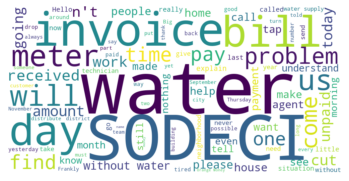

In [14]:
# Converting a list of words into a unique string
list_string = (" ").join(combined_list)

# Create and generate a word cloud image:
stopwords = set(STOPWORDS)
stopwords.update(["hello", "dear", "good evening", "good morning", "ok","because","since", "this","thi"])
print(stopwords)
wordcloud = WordCloud(stopwords = STOPWORDS, width=1000, height=500, background_color='white', max_words=100).generate(list_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud_fcbk_comments.png", bbox_inches='tight')
plt.show()
plt.close()

In [18]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(list_string)
print(text_dictionary)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
fel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(fel_freq.items())[:5])

{'Hello': 9, 'dear': 4, 'find': 20, 'morning': 11, 'SODECI': 89, 'closure': 3, 'notice': 3, 'according': 1, 'unpaid': 15, 'yet': 6, 'always': 6, 'pay': 20, 'Orange': 1, 'money': 5, 'Moovmoney': 1, 'little': 9, 'check': 3, 'realize': 3, 'paying': 3, 'someone': 6, 'hurts': 1, 'seen': 1, 'small': 3, 'fr': 4, 'paid': 7, 'height': 1, 'Fortunately': 2, 'screenshots': 1, 'electronic': 1, 'question': 3, 'person': 4, 'whose': 2, 'way': 7, 'reimbursement': 1, 'course': 2, 'must': 6, 'amount': 17, 'today': 15, 'avoid': 1, 'take': 8, 'correct': 2, 'number': 7, 'meter': 33, 'PS': 1, 'owner': 3, 'allocated': 1, 'apartment': 2, 'long': 6, 'moved': 1, 'building': 6, 'wrong': 3, 'reservations': 2, 'invoice': 41, 'name': 5, 'wife': 1, 'everyone': 5, 'asked': 4, 'contract': 4, 'change': 5, 'illiterate': 1, 'nothing': 11, 'meet': 1, 'manager': 2, 'explain': 10, 'going': 15, 'last': 9, 'September': 6, 'wanting': 4, 'settle': 3, 'bill': 34, 'unwittingly': 1, 'made': 12, 'advance': 4, 'payment': 13, 'called'

In [17]:
#water shaped word cloud

water_mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/wordcloud.png"))
water_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [16]:
#change the format of image to a 255 matrix
#def transform_format(val):
           #return 255
   

 #Transform your mask into a new one that will work with the function:
#transformed_mask = np.ndarray((water_mask.shape[0],water_mask.shape[1]), np.int32)

#for i in range(len(water_mask)):
 #   transformed_mask[i] = list(map(transform_format, water_mask[i]))
#print(transformed_mask)

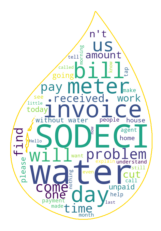

In [19]:

wordcloud = WordCloud(stopwords = STOPWORDS, background_color='white', height=500,
                      width=1000, mask= water_mask, contour_color= 'gold',
                      max_words = 50 , contour_width= 3).generate(list_string)
# Display the generated image:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud_drop_shape.png", bbox_inches='tight')
plt.show()
plt.close()